In [1]:
import pandas as pd
import requests
import os
from bs4 import BeautifulSoup
from time import sleep
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
font_path = 'malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font_name)

In [6]:
# NaN(Not a Number, 결측치) : 측정되지 않은 데이터
df = pd.read_excel('excel/시도별_전출입_인구수.xlsx')
df = df.drop(0, axis = 'index')
df['전출지별'] = df['전출지별'].ffill()
df = df.rename({'전출지별':'전출지', '전입지별':'전입지'}, axis = 'columns')
df.head(3)

,전출지,전입지,1970,1971,1972,1973,1974,1975,1976,1977,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,7629098,7755286,7378430,7154226,7297099,7104398,7735491,7213422,6152155,6128738
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,1573594,1589431,1515602,1472937,1439707,1426493,1578127,1418187,1201527,1206963
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,485710,507031,459015,439073,416095,411704,491829,441323,383848,364271


In [84]:
mask = (df['전출지'] == '서울특별시') & (df['전입지'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop('전출지', axis = 'columns')
df_seoul = df_seoul.set_index('전입지')
df_seoul.head(3)

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,1661425,1726687,1655859,1571423,1549937,1476081,1642977,1524430,1236867,1238213
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17320,17009,15062,14484,13093,12805,13209,13078,11532,11748
대구광역시,-,-,-,-,-,-,-,-,-,-,...,10062,10191,9623,8891,8446,7897,8792,8350,7716,8289


In [14]:
sr1 = df_seoul.loc['경기도']
print('인덱스:', sr1.index[:5])
print('값들:')
sr1.values

인덱스: Index(['1970', '1971', '1972', '1973', '1974'], dtype='object')
값들:


array([130149, 150313, 93333, 143234, 149045, 253705, 202276, 207722,
       237684, 278411, 297539, 252073, 320174, 400875, 352238, 390265,
       412535, 405220, 415174, 412933, 473889, 384714, 428344, 502584,
       542204, 599411, 520566, 495454, 407050, 471841, 435573, 499575,
       516765, 457656, 400206, 414621, 449632, 431637, 412408, 398282,
       410735, 373771, 354135, 340801, 332785, 359337, 370760, 342433,
       368536, 334293, 375867, 362116, 279731, 279375], dtype=object)

In [18]:
sr1 = sr1.astype(int)
sr1.values

array([130149, 150313,  93333, 143234, 149045, 253705, 202276, 207722,
       237684, 278411, 297539, 252073, 320174, 400875, 352238, 390265,
       412535, 405220, 415174, 412933, 473889, 384714, 428344, 502584,
       542204, 599411, 520566, 495454, 407050, 471841, 435573, 499575,
       516765, 457656, 400206, 414621, 449632, 431637, 412408, 398282,
       410735, 373771, 354135, 340801, 332785, 359337, 370760, 342433,
       368536, 334293, 375867, 362116, 279731, 279375])

### 1의 모형(figure)에 1개의 그래프(plot)를 그리는 순서
   1-1. 모형의 크기<br>
   1-2. 모형안에 그래프 그리기<br>
   1-3. 모형안에 그래프 꾸미기<br>
   1-4. 그래프 출력 & 저장<br>

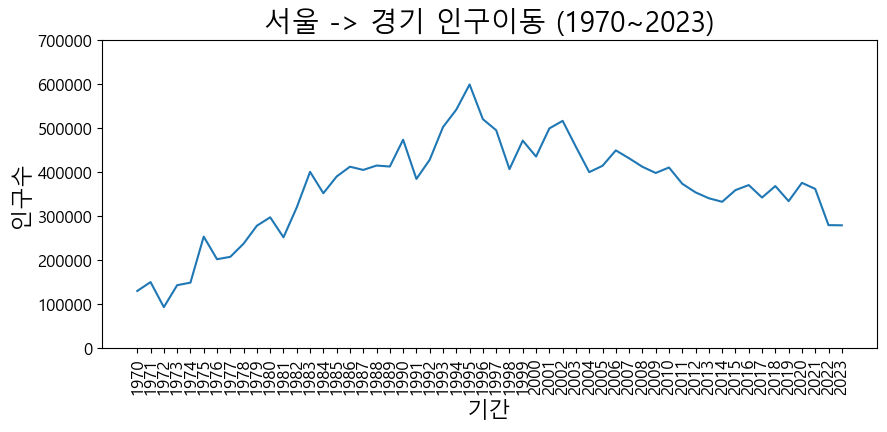

In [43]:
# 1-1. 모형의 크기
plt.figure(figsize = (10, 4))

# 1-2. 모형안에 그래프 그리기
# pyplot.plot(시리즈)       : 선그래프, index가 X축, values가 데이터
# pyplot.plot(X축, 데이터)  : 선그래프
plt.plot(sr1.index, sr1.values)

# 1-3. 모형안에 그래프 꾸미기
plt.xticks(rotation = 90, size = 12)
plt.yticks(size = 12)
plt.ylim(0, 700000)
plt.xlabel('기간', size = 16)
plt.ylabel('인구수', size = 16)
plt.title('서울 -> 경기 인구이동 (1970~2023)', size = 20)

# 1-4. 그래프 출력 & 저장
#plt.show()
plt.savefig('결과.png')

### 1의 모형(figure)에 여러개의 그래프(subplot)를 그리는 순서
   2-1. 모형의 크기<br>
   2-2. 모형안에 원하는 모양과 수량의 서브플롯 생성<br>
   2-3. 서브플롯마다 그래프<br>
   2-4. 서브플롯마다 그래프 꾸미기<br>
   2-5. 그래프 출력 & 저장<br>

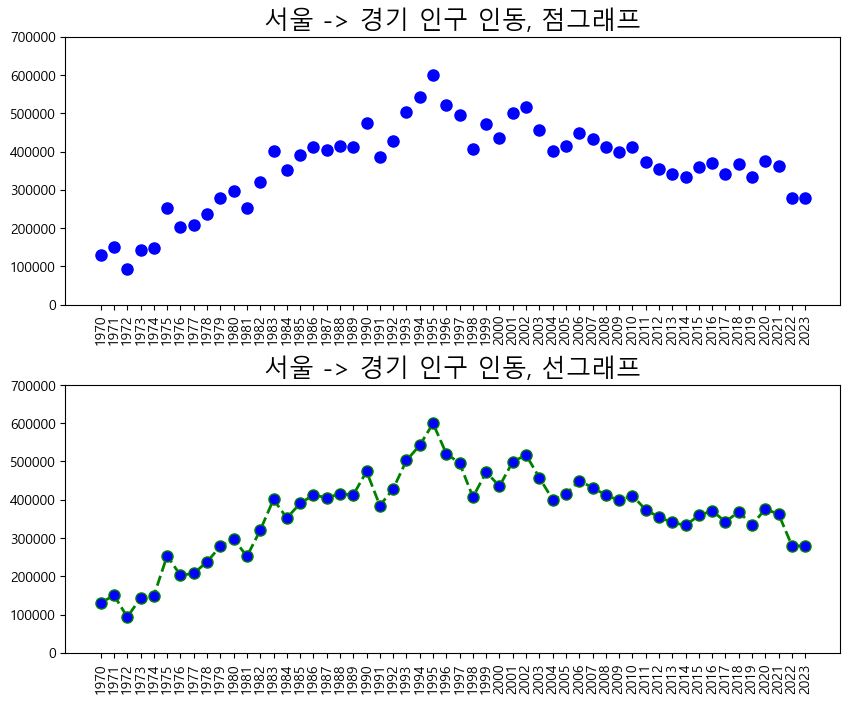

In [80]:
# 2-1. 모형의 크기
figure = plt.figure(figsize = (10, 8))

# 2-2. 모형안에 원하는 모양과 수량의 서브플롯 생성
ax1 = figure.add_subplot(2, 1, 1)
ax2 = figure.add_subplot(2, 1, 2)

# 2-3. 서브플롯마다 그래프 그리기
ax1.plot(sr1, 'o', color = 'blue', markersize = 8, markerfacecolor = 'blue')
ax2.plot(sr1, ls = '--', linewidth = 2, color = 'green', marker = 'o',
         markersize = 8, markerfacecolor = 'blue')

# 2-4. 서브플롯마다 그래프 꾸미기
figure.subplots_adjust(hspace = 0.3)
ax1.set_title('서울 -> 경기 인구 인동, 점그래프', size = 18)
ax1.set_ylim(0, 700000)
ax1.set_xticklabels(sr1.index, rotation = 90)
ax2.set_title('서울 -> 경기 인구 인동, 선그래프', size = 18)
ax2.set_ylim(0, 700000)
ax2.set_xticklabels(sr1.index, rotation = 90)

# 2-5. 그래프 출력 & 저장
plt.show()

In [90]:
df4 = df_seoul.loc[['충청남도', '경상북도', '강원특별자치도', '전라남도'], '1980':]
df4.rename({'강원특별자치도':'강원도'}, inplace = True)
df4

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
전입지,,,,,,,,,,,,,,,,,,,,,
충청남도,54480,51369,48834,55344,50318,49520,47888,48678,49038,31707,...,21473,22299,21741,21020,20426,18522,19814,20129,17573,17060
경상북도,48839,30928,27440,29601,26842,26297,26221,27844,26235,22374,...,14456,15113,14236,12464,12017,11935,11987,12568,11095,10607
강원도,32858,32116,31013,31308,30470,29911,28489,28699,26691,26394,...,21173,22659,21590,21016,19558,19105,20701,20974,18374,16340
전라남도,56251,57645,55408,57737,52779,52629,41082,42667,40695,36188,...,14591,14598,13065,12426,11209,11334,11210,11305,9839,8828


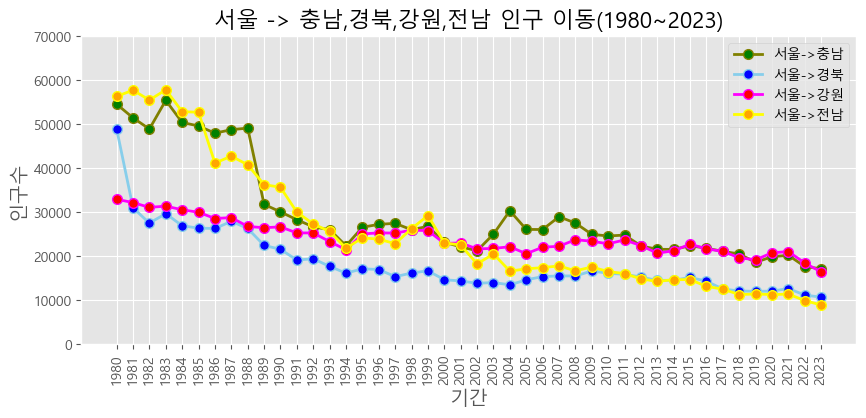

In [119]:
plt.style.use('ggplot')

figure = plt.figure(figsize = (10, 4))
ax = figure.add_subplot(1, 1, 1)

ax.plot(df4.loc['충청남도'], marker = 'o', linewidth = 2, markersize = 7,
        color = 'olive', markerfacecolor = 'green', label = '서울->충남')
ax.plot(df4.loc['경상북도'], marker = 'o', linewidth = 2, markersize = 7,
        color = 'skyblue', markerfacecolor = 'blue', label = '서울->경북')
ax.plot(df4.loc['강원도']  , marker = 'o', linewidth = 2, markersize = 7,
        color = 'magenta', markerfacecolor = 'red', label = '서울->강원')
ax.plot(df4.loc['전라남도'], marker = 'o', linewidth = 2, markersize = 7,
        color = 'yellow', markerfacecolor = 'orange', label = '서울->전남')

ax.legend(loc = 'best')
ax.set_ylim(0, 70000)
ax.set_xlabel('기간', size = 14)
ax.set_ylabel('인구수', size = 14)
ax.set_xticklabels(df4.columns, rotation = 90)
ax.set_title('서울 -> 충남,경북,강원,전남 인구 이동(1980~2023)', size = 16)

plt.show()

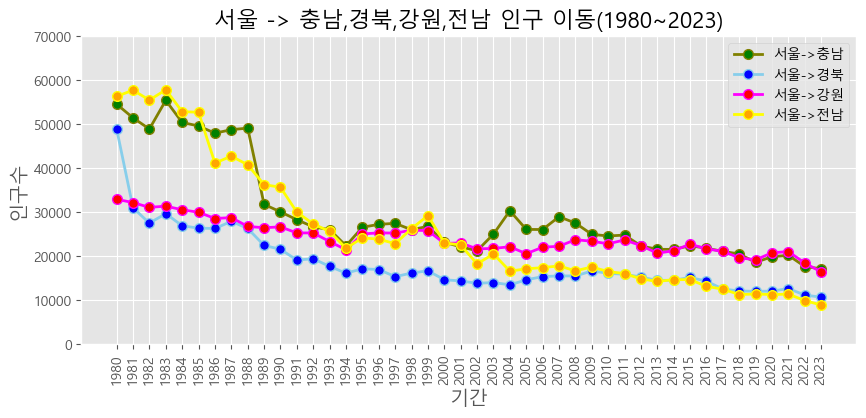

In [125]:
idx_list = ['충청남도', '경상북도', '강원도', '전라남도']
color_list = ['olive', 'skyblue', 'magenta','yellow']
face_list = ['green', 'blue', 'red', 'orange']
label_list = ['충남', '경북', '강원', '전남']

plt.style.use('ggplot')

figure = plt.figure(figsize = (10, 4))
ax = figure.add_subplot(1, 1, 1)

for idx, color, face, label in zip(idx_list, color_list, face_list, label_list):
    ax.plot(df4.loc[idx], marker = 'o', linewidth = 2, markersize = 7,
        color = color, markerfacecolor = face, label = f'서울->{label}')

ax.legend(loc = 'best')
ax.set_ylim(0, 70000)
ax.set_xlabel('기간', size = 14)
ax.set_ylabel('인구수', size = 14)
ax.set_xticklabels(df4.columns, rotation = 90)
title = ','.join(label_list)
ax.set_title(f'서울 -> {title} 인구 이동(1980~2023)', size = 16)

plt.show()

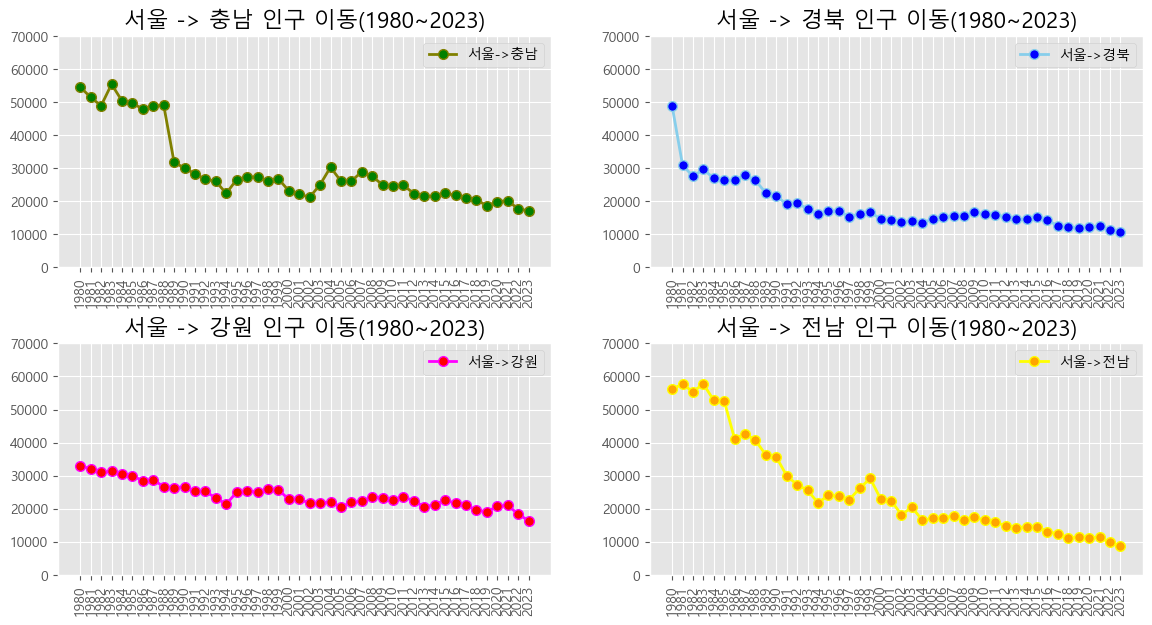

In [147]:
idx_list = ['충청남도', '경상북도', '강원도', '전라남도']
color_list = ['olive', 'skyblue', 'magenta','yellow']
face_list = ['green', 'blue', 'red', 'orange']
label_list = ['충남', '경북', '강원', '전남']

figure= plt.figure(figsize = (14, 7))

ax_list = []
for n in range(1, 5):
    ax = figure.add_subplot(2, 2, n)
    ax_list.append(ax)

figure.subplots_adjust(hspace = 0.33)
for ax, idx, color, face, label in zip(ax_list, idx_list, color_list, face_list, label_list):
    ax.plot(df4.loc[idx], marker = 'o', linewidth = 2, markersize = 7,
            color = color, markerfacecolor = face, label = f'서울->{label}')
    ax.set_ylim(0, 70000)
    ax.legend(loc = 'best')
    ax.set_xticklabels(df4.columns, rotation = 90)
    title = f'서울 -> {label} 인구 이동(1980~2023)'
    ax.set_title(title, size = 16)
plt.show()

In [166]:
df5 = df_seoul.loc[['충청남도', '경상북도', '강원특별자치도', '전라남도'], '2013':]
df5.rename({'강원특별자치도':'강원도'}, inplace = True)
df5.columns = df5.columns.map(int)

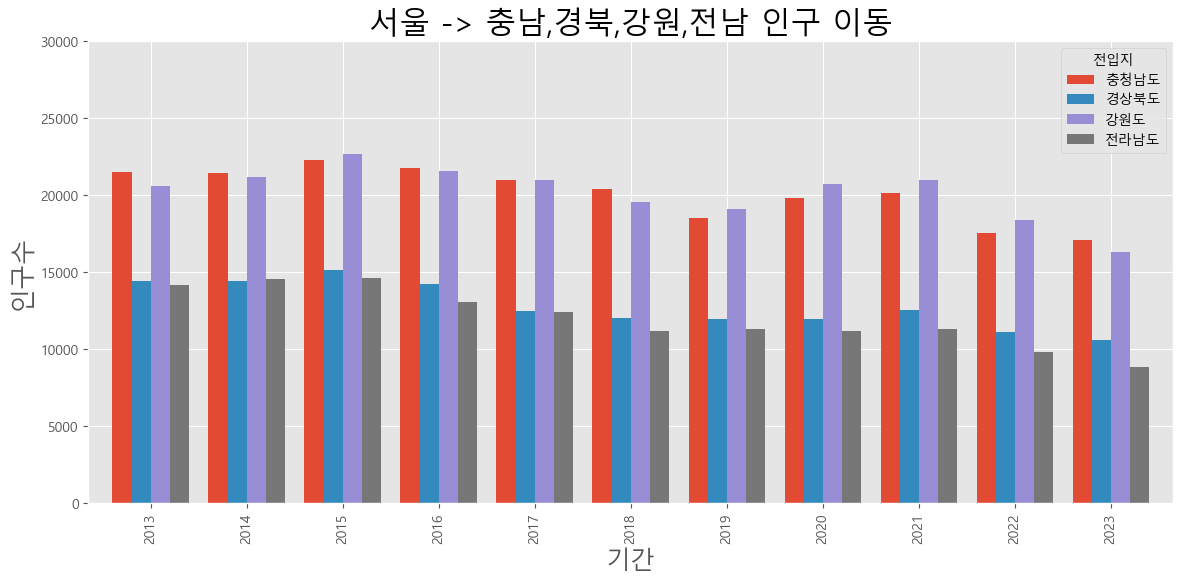

In [190]:
idx_list = ['충청남도', '경상북도', '강원도', '전라남도']

ax = df5.T.plot(kind = 'bar', figsize = (14, 6), width = 0.8)
ax.set_title('서울 -> 충남,경북,강원,전남 인구 이동', size = 22)
ax.set_ylim(0, 30000)
ax.set_xlabel('기간', size = 18)
ax.set_ylabel('인구수', size = 18)
plt.show()

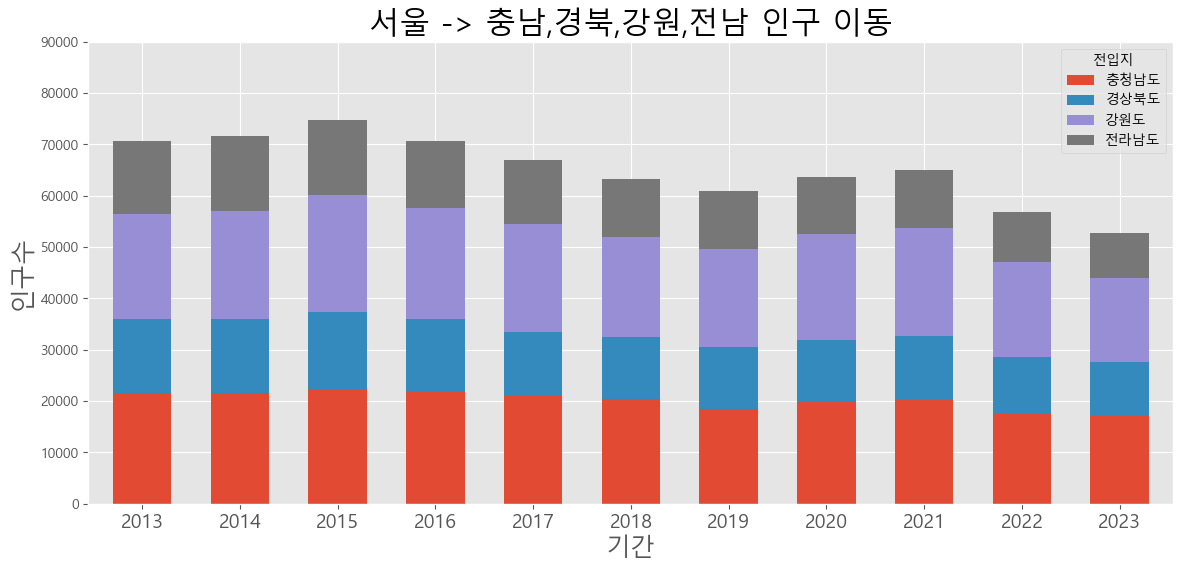

In [203]:
year_list = map(str, range(2013, 2024))

ax = df5.T.plot(kind = 'bar', figsize = (14, 6), width = 0.6, stacked = True)
ax.set_title('서울 -> 충남,경북,강원,전남 인구 이동', size = 22)
ax.set_ylim(0, 90000)
ax.set_xlabel('기간', size = 18)
ax.set_ylabel('인구수', size = 18)
ax.set_xticklabels(year_list, rotation = 0, size = 14)

plt.show()